In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [4]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)	
df['MedHouseValue'] = data.target

In [5]:
df.shape

(20640, 9)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


sns.pairplot(df[['MedInc', 'AveRooms', 'HouseAge', 'Population', 'MedHouseValue']])

In [7]:
X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue'].values.reshape(-1, 1)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

In [10]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1 / (2*m)) * np.sum(error ** 2)
    return cost

In [11]:
def gradient_descent(X, y, theta, learning_rate, epochs):
    m = len(y)
    cost_history = []
    
    for _ in range(epochs):
        predictions = X.dot(theta)
        error = predictions - y
        gradient = (1 / m) * X.T.dot(error)
        theta = theta - learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
    return theta, cost_history

In [23]:
theta_initial = np.zeros((X_scaled.shape[1], 1))

In [13]:
theta_optimal, cost_history = gradient_descent(X_scaled, y, theta_initial, learning_rate=0.01, epochs=500)

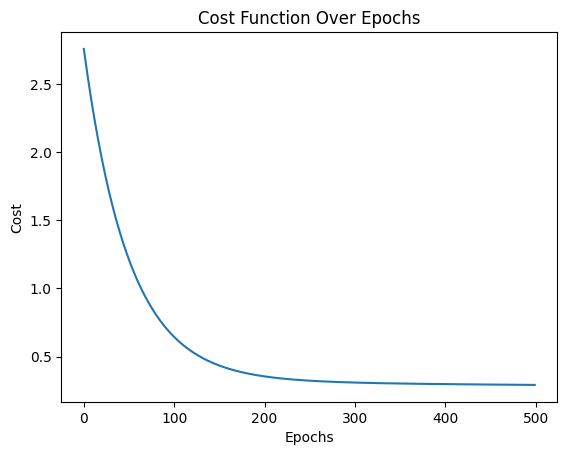

In [14]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')	
plt.title('Cost Function Over Epochs')
plt.show()

In [15]:
predictions = X_scaled.dot(theta_optimal)

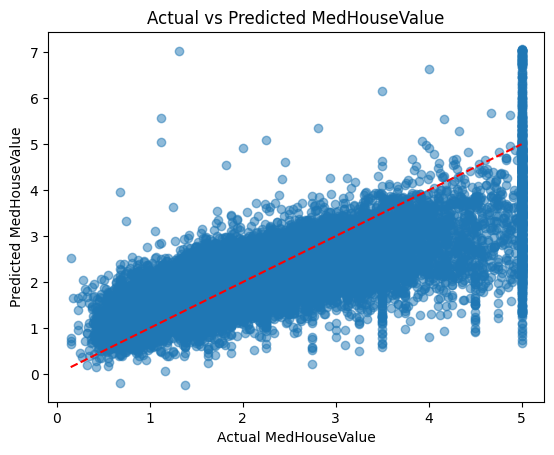

In [16]:
min = y.min()
max = y.max()

plt.Figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.5)
plt.xlabel('Actual MedHouseValue')
plt.ylabel('Predicted MedHouseValue')
plt.title('Actual vs Predicted MedHouseValue')
plt.plot([min, max], [min, max], color='red', linestyle='--')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.5863025860905486
R^2 Score: 0.5596842371974025


In [31]:
theta_optimal

array([[ 2.05496674],
       [ 0.78518972],
       [ 0.1945964 ],
       [-0.02191173],
       [ 0.02822955],
       [ 0.0198853 ],
       [-0.04365399],
       [-0.32138382],
       [-0.27873539]])